In [25]:
import os,sys #user to create and modify file name and save it
import pandas as pd #for dataframe activities
from datetime import datetime,timedelta #for the time related activities
import matplotlib.pyplot as plt #for the Ploting purpose
import numpy as np #numerical fucntions
import datetime 
import warnings #to ignore unnecessary warnings
import xarray as xr
import numpy as np
import regionmask
import geopandas as gp #ReadingShapefile
import glob                                                                 
import xlsxwriter #for writing in Excel
warnings.filterwarnings('ignore')

#### Data Reading

In [26]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/Nd')
ds=xr.open_dataset('Nd_PreMon.nc')
Nd=ds.__xarray_dataarray_variable__

lon, lat, time=Nd.indexes.values()
lat=lat.values
lon=lon.values


### Visualizing the DataPoints

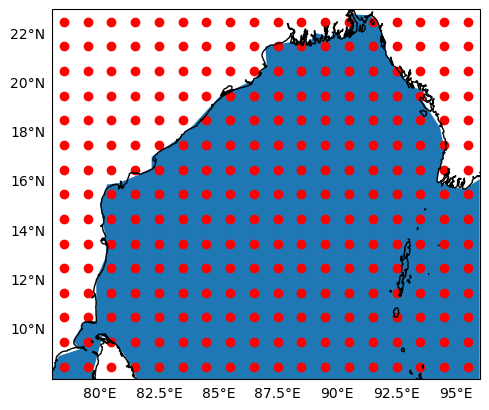

In [27]:
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs

#Makind A Coodinate array
coord=[]
for x in lon:
    for y in lat:
        coord.append([x,y])
coord=np.array(coord)

#Reading the Shape File
ax = plt.axes(projection=ccrs.PlateCarree())
shapefile ="/Volumes/ACIML/Main/SHPs/BOB_OCEAN/BOB_OCEAN.shp"
countries=gp.read_file(shapefile,engine='pyogrio')

# Ploting
countries.plot(ax=ax,column='featurecla')
ax.scatter(coord[:,0],coord[:,1],color='red')

#Adjsutments
min_lon = 78.00
max_lon = 96.00
min_lat = 8.00
max_lat = 23.00

ax.coastlines()
ax.set_xlim([min_lon, max_lon])
ax.set_ylim([min_lat, max_lat])
gridlines = ax.gridlines(draw_labels=True,linewidth=0)
gridlines.top_labels = False
gridlines.right_labels = False

plt.show()

# Sorting out datapoints within the AOI

In [28]:
shapefile ="/Volumes/ACIML/Main/SHPs/BOB_OCEAN/BOB_OCEAN.shp"
countries=gp.read_file(shapefile,engine='pyogrio')

#Clipping to shape File and Creating Mask File
shapefile ="/Volumes/ACIML/Main/SHPs/BOB_OCEAN/BOB_OCEAN.shp"
countries=gp.read_file(shapefile,engine='pyogrio')
c_list=list(countries['featurecla'])
c_list_unique=set(list(countries['featurecla']))
indexes=[c_list.index(x) for x in c_list_unique]
countries_mask_poly=regionmask.Regions(outlines=countries.geometry[indexes],name='featurecla',numbers=indexes,names=countries.featurecla[indexes])

mask=countries_mask_poly.mask(ds,lat_name='latitude',lon_name='longitude')

In [29]:
Nlat=mask.latitude.where(mask==0).values
Nlon=mask.longitude.where(mask==0).values.transpose()

Llat=Nlat.flatten()
Llon=Nlon.flatten()

#Collecting the the coordinates
Nlat=Llat[~np.isnan(Llat)]
Nlon=Llon[~np.isnan(Llon)]

### Verifying the datapoints

In [30]:
# set of latitude and longitude pairs
lat_lon_pairs = []
for x in range(0,183):
    lat_lon_pairs.append((Nlat[x], Nlon[x]))
data_values = []

# loop over the latitude and longitude pairs
for lat, lon in lat_lon_pairs:
    # get the indices of the latitude and longitude
    lat_index = np.where(mask.latitude == lat)[0][0]
    lon_index = np.where(mask.longitude == lon)[0][0]
    
    # extract the data value using indexing
    data_value = mask.values[lat_index, lon_index]
    
    # append the data value to the list
    data_values.append(data_value)

data_values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

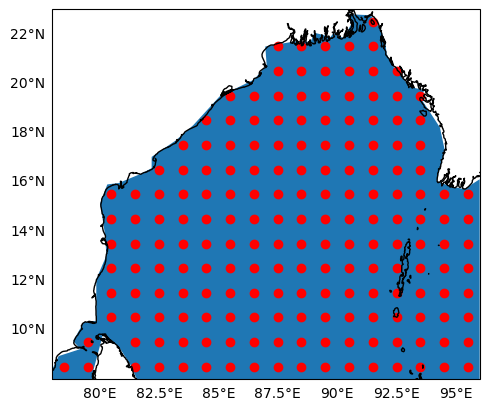

In [31]:
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs

# #Makind A Coodinate array
# coord=[]
# for x in lon:
#     for y in lat:
#         coord.append([x,y])
# coord=np.array(coord)

#Reading the Shape File
ax = plt.axes(projection=ccrs.PlateCarree())
shapefile ="/Volumes/ACIML/Main/SHPs/BOB_OCEAN/BOB_OCEAN.shp"
countries=gp.read_file(shapefile,engine='pyogrio')

# Ploting
countries.plot(ax=ax,column='featurecla')
# ax.scatter(coord[:,0],coord[:,1],color='red')
ax.scatter(Nlon[:],Nlat[:],color='red')

#Adjsutments
min_lon = 78.00
max_lon = 96.00
min_lat = 8.00
max_lat = 23.00

ax.coastlines()
ax.set_xlim([min_lon, max_lon])
ax.set_ylim([min_lat, max_lat])
gridlines = ax.gridlines(draw_labels=True,linewidth=0)
gridlines.top_labels = False
gridlines.right_labels = False

plt.show()

## Getting the the list of datas

#### For Nd 

In [32]:
Nd_values=[]
for lat, lon in lat_lon_pairs:
    Nd1=Nd.sel(longitude=lon, latitude=lat, method='nearest')
    Nd_values=np.append(Nd_values, Nd1.values.flatten())

### For ERA

In [33]:
#For MeanWind and WindDirection
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5')
file='U-Wind/PreMonDaily_Uwind850.nc'
ds=xr.open_dataset(file)
u=ds.u

file='V-Wind/PreMonDaily_Vwind850.nc'
ds=xr.open_dataset(file)
v=ds.v

# Compute the wind speed and direction
MW = np.sqrt(u**2 + v**2)
WD = np.degrees(np.arctan2(u, v))
WD = (WD + 360) % 360

MW_values=[]
for lat, lon in lat_lon_pairs:
    MW1=MW.sel(longitude=lon, latitude=lat, method='nearest')
    MW_values=np.append(MW_values, MW1.values.flatten())
    

WD_values=[]
for lat, lon in lat_lon_pairs:
    WD1=WD.sel(longitude=lon, latitude=lat, method='nearest')
    WD_values=np.append(WD_values, WD1.values.flatten())

In [34]:
#For VerticalWind
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5/VerticalVelocity')
ds=xr.open_dataset('PreMonDaily_VerticalVelocity.nc')
W=ds.w

W_values=[]
for lat, lon in lat_lon_pairs:
    W1=W.sel(longitude=lon, latitude=lat, method='nearest')
    W_values=np.append(W_values, W1.values.flatten())

In [35]:
#For LTS
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA5/LTS')
ds=xr.open_dataset('PreMonDaily_LTS.nc')
LTS=ds.t

LTS_values=[]
for lat, lon in lat_lon_pairs:
    LTS1=LTS.sel(longitude=lon, latitude=lat, method='nearest')
    LTS_values=np.append(LTS_values, LTS1.values.flatten())

In [36]:
#For PBLH
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/PBLH')
ds=xr.open_dataset('PreMonDaily_PBLH.nc')
PBLH=ds.TCZPBL

PBLH_values=[]
for lat, lon in lat_lon_pairs:
    PBLH1=PBLH.sel(lon=lon, lat=lat, method='nearest')
    PBLH_values=np.append(PBLH_values, PBLH1.values.flatten())

In [37]:
#For RH
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/ERA-5 RH/PreMon')
ds=xr.open_dataset('PreMonDaily_RHavg.nc')
RH=ds.r

RH_values=[]
for lat, lon in lat_lon_pairs:
    RH1=RH.sel(longitude=lon, latitude=lat, method='nearest')
    RH_values=np.append(RH_values, RH1.values.flatten())

### For Merra

In [38]:
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/MERRA2')
file='Composites/N_MERRA-PreMon.nc'
ds=xr.open_dataset(file)

sm=ds.BC_AOD+ds.OC_AOD+ds.SULFATE_AOD
dst=ds.SEASALT_AOD+ds.DUST_AOD

sm_values=[]
dst_values=[]

SMOKE=ds.SULFATE_AOD
CARBON=ds.BC_AOD+ds.OC_AOD

SMOKE_values=[]
CARBON_values=[]

for lat, lon in lat_lon_pairs:

    sm1=sm.sel(lon=lon, lat=lat, method='nearest')
    sm_values=np.append(sm_values, sm1.values.flatten())
        
    dst1=dst.sel(lon=lon, lat=lat, method='nearest')
    dst_values=np.append(dst_values, dst1.values.flatten())

    SMOKE1=SMOKE.sel(lon=lon, lat=lat, method='nearest')
    SMOKE_values=np.append(SMOKE_values, SMOKE1.values.flatten())

    CARBON1=CARBON.sel(lon=lon, lat=lat, method='nearest')
    CARBON_values=np.append(CARBON_values, CARBON1.values.flatten())

    
file='MERRA-PreMon.nc'
ds=xr.open_dataset(file)

AOD=ds.AOD
AOD_values=[]
for lat, lon in lat_lon_pairs:
    AOD1=AOD.sel(lon=lon, lat=lat, method='nearest')
    AOD_values=np.append(AOD_values, AOD1.values.flatten())



In [39]:
# For AI
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/MERRA2')
file='MERRA-PreMon.nc'
ds=xr.open_dataset(file)

AI=ds.AI
AI_values=[]

for lat, lon in lat_lon_pairs:
    AI1=AI.sel(lon=lon, lat=lat, method='nearest')
    AI_values=np.append(AI_values, AI1.values.flatten())

### For MODIS

In [40]:
# For Cloud Drop Effective Radius
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/MODIS')
file='FINAL_MODIS_PreMon.nc'
ds=xr.open_dataset(file)

CR=ds.Cloud_Effective_Radius_Liquid_Mean
CR_values=[]

CTP=ds.Cloud_Top_Pressure_Mean
CTP_values=[]

COT=ds.Cloud_Optical_Thickness_Combined_Mean
COT_values=[]

CTT=ds.Cloud_Top_Temperature_Mean
CTT_values=[]

for lat, lon in lat_lon_pairs:
    CR1=CR.sel(longitude=lon, latitude=lat, method='nearest')
    CR_values=np.append(CR_values, CR1.values.flatten())

    CTP1=CTP.sel(longitude=lon, latitude=lat, method='nearest')
    CTP_values=np.append(CTP_values, CTP1.values.flatten())

    COT1=COT.sel(longitude=lon, latitude=lat, method='nearest')
    COT_values=np.append(COT_values, COT1.values.flatten())

    CTT1=CTT.sel(longitude=lon, latitude=lat, method='nearest')
    CTT_values=np.append(CTT_values, CTT1.values.flatten())

# AOD=ds.AOD_550_Dark_Target_Deep_Blue_Combined_Mean
# AOD_values=[]
# for lat, lon in lat_lon_pairs:
#     AOD1=AOD.sel(longitude=lon, latitude=lat, method='nearest')
#     AOD_values=np.append(AOD_values, AOD1.values.flatten())

In [41]:
# Liquid Water Path
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/LWP')
file='LWP_MODIS_PreMon.nc'
ds=xr.open_dataset(file)

LWP=ds.LWP
LWP_values=[]

for lat, lon in lat_lon_pairs:
    LWP1=LWP.sel(longitude=lon, latitude=lat, method='nearest')
    LWP_values=np.append(LWP_values, LWP1.values.flatten())

In [42]:
# Precipitable water
os.chdir('/Volumes/PtatoBasket/ACIML/Datasets/PrecipitableWater-MODIS')
file='PreMonDaily_PrecipWater.nc'
ds=xr.open_dataset(file)

PW=ds.Atmospheric_Water_Vapor_QA_Mean
PW_values=[]

for lat, lon in lat_lon_pairs:
    PW1=PW.sel(longitude=lon, latitude=lat, method='nearest')
    PW_values=np.append(PW_values, PW1.values.flatten())

## Write it to Excel

### ML3

In [43]:
import xarray as xr
import numpy as np
import xlsxwriter
os.chdir('/Volumes/PtatoBasket/ACIML/Outputs')

In [44]:
# import csv 

# # name of csv file 
# filename = "ML4-PreMon.csv"
# fields=['PBLH' ,
#                     'WindDirection-850', 'MeanWind-850', 'RH', 'V-850', 'SMOKE-AOD',
#                     'DUST-AOD', 'AI','PrecipitableVapour', 'PreciCal', 'LTS', 'Nd', 'CloudRadius', 'LWP']
# # writing to csv file 
# with open(filename, 'w') as csvfile: 
#     # creating a csv dict writer object 
#     writer = csv.DictWriter(csvfile, fieldnames = fields) 
        
#     # writing headers (field names) 
#     writer.writeheader() 
        
#     # writing data rows 
#     writer.writerows(mydict) 


In [45]:
%%script echo skipping
# Create Excel workbook and worksheet
workbook = xlsxwriter.Workbook('ML5.1-PreMonM1.xlsx')
worksheet = workbook.add_worksheet(name='Sheet1')


# Write column headers
worksheet.write_row(0, 0, ['PBLH' ,
                    'WindDirection-850', 'MeanWind-850', 'RH', 'V-850', 'SMOKE-AOD',
                    'DUST-AOD', 'AI','PrecipitableVapour', 'LTS', 'Nd', 'CloudRadius', 'LWP'])


i=0
for x in range(len(LWP_values)):
    if not any([np.isnan(LWP_values[x]),
            np.isnan(CR_values[x]),
           np.isnan(Nd_values[x]),
           np.isnan(LTS_values[x]),
           np.isnan(PW_values[x]),
           np.isnan(AI_values[x]),
           np.isnan(dst_values[x]),
           np.isnan(sm_values[x]),
           np.isnan(W_values[x]),
           np.isnan(RH_values[x]),
           np.isnan(MW_values[x]),
           np.isnan(WD_values[x]),
           np.isnan(PBLH_values[x]),
           np.isnan(CTP_values[x]),
           np.isnan(CTT_values[x]),
           np.isnan(COT_values[x]),
           ]):
                i=i+1
                worksheet.write_number(i,0,PBLH_values[x])
                worksheet.write_number(i,1,WD_values[x])
                worksheet.write_number(i,2,MW_values[x])
                worksheet.write_number(i,3,RH_values[x])
                worksheet.write_number(i,4,W_values[x])
                worksheet.write_number(i,5,sm_values[x])
                worksheet.write_number(i,6,dst_values[x])
                worksheet.write_number(i,7,AI_values[x])
                worksheet.write_number(i,8,PW_values[x])
                worksheet.write_number(i,9,LTS_values[x])
                worksheet.write_number(i,10,Nd_values[x])
                worksheet.write_number(i,11,CR_values[x])
                worksheet.write_number(i,12,LWP_values[x])
                worksheet.write_number(i,13,CTP_values[x])
                worksheet.write_number(i,14,CTT_values[x])
                worksheet.write_number(i,15,COT_values[x])

workbook.close()

skipping


In [46]:
%%script echo skipping
labels=['PBLH' ,'WindDirection-850', 'MeanWind-850', 'RH', 'VerticalVelocity-850', 'SMOKE-AOD','DUST-AOD', 'AI','PrecipitableVapour', 'LTS', 'Nd', 'CloudRadius','CTP','CTT','COT','LWP']
df=pd.DataFrame(data=[PBLH_values,WD_values,MW_values,RH_values,W_values,sm_values,dst_values,AI_values,PW_values,LTS_values,Nd_values,CR_values,CTP_values,CTT_values,COT_values,LWP_values]).T
df.columns=labels
df=df.dropna(how='any',axis=0).reset_index(drop=True)
df.to_excel('ML5.1-PreMonM1.xlsx')

skipping


# Stat Sheet

In [47]:
# %%script echo skipping÷

os.chdir('/Volumes/PtatoBasket/ACIML/Outputs/Sheets_of_Stat')

# Create Excel workbook and worksheet
workbook = xlsxwriter.Workbook('STAT1-PreMon.xlsx')
worksheet = workbook.add_worksheet(name='Sheet1')


# Write column headers
worksheet.write_row(0, 0, ['AnthroPogenic-AOD',
                    'DUST-AOD', 'AI', 'Nd', 'CloudRadius','LWP','AOD','CarbonAOD', 'SmokeAOD'])

i=0
for x in range(len(LWP_values)):
    if not any([np.isnan(LWP_values[x]),
           np.isnan(CR_values[x]),
           np.isnan(Nd_values[x]),
           np.isnan(LTS_values[x]),
           np.isnan(PW_values[x]),
           np.isnan(AI_values[x]),
           np.isnan(dst_values[x]),
           np.isnan(sm_values[x]),
           np.isnan(W_values[x]),
           np.isnan(RH_values[x]),
           np.isnan(MW_values[x]),
           np.isnan(WD_values[x]),
           np.isnan(PBLH_values[x]),
           np.isnan(AOD_values[x])
           ]):    
            i=i+1
            # worksheet.write_number(i,0,PBLH_values[x])
            # worksheet.write_number(i,1,WD_values[x])
            # worksheet.write_number(i,2,MW_values[x])
            # worksheet.write_number(i,3,RH_values[x])
            # worksheet.write_number(i,4,W_values[x])
            worksheet.write_number(i,0,sm_values[x])
            worksheet.write_number(i,1,dst_values[x])
            worksheet.write_number(i,2,AI_values[x])
            # worksheet.write_number(i,8,PW_values[x])
            # worksheet.write_number(i,9,PC_values[x])
            # worksheet.write_number(i,10,LTS_values[x])
            worksheet.write_number(i,3,Nd_values[x])
            worksheet.write_number(i,4,CR_values[x])
            worksheet.write_number(i,5,LWP_values[x])
            worksheet.write_number(i,6,AOD_values[x])
            worksheet.write_number(i,7,CARBON_values[x])
            worksheet.write_number(i,8,SMOKE_values[x])


workbook.close()

In [48]:
xx=AI_values[~np.isnan(AI_values)]